In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.head()

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

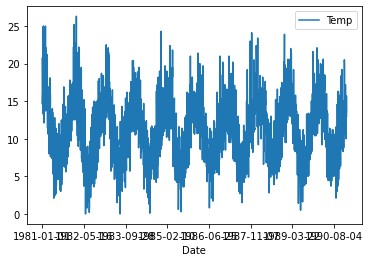

In [3]:
series.plot()
plt.show()

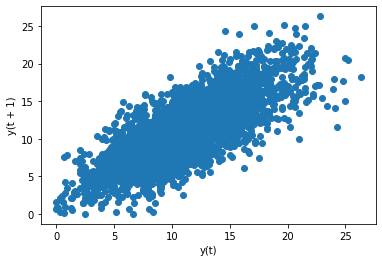

In [5]:
pd.plotting.lag_plot(series)
plt.show()

In [8]:
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
result = df.corr()
result

t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000

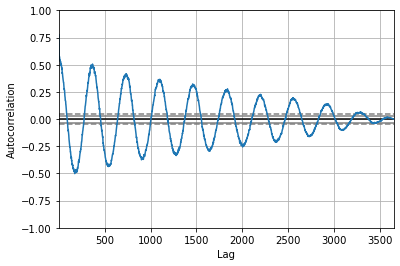

In [9]:
pd.plotting.autocorrelation_plot(series)
plt.show()

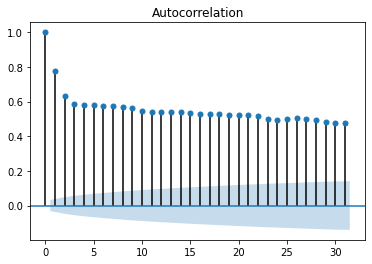

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
plt.show()

MSE: 3.4228571428571413


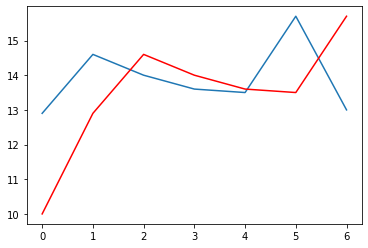

In [12]:
from sklearn.metrics import mean_squared_error
X = df.values
train, test = X[1:len(X) - 7], X[len(X) - 7:]
train_x, train_y = train[:, 0], train[:, 1]
test_x, test_y = test[:, 0], test[:, 1]

def persistence_model(x):
    return x

predictions = []
for x in test_x:
    yhat = persistence_model(x)
    predictions.append(yhat)
    
test_score = mean_squared_error(test_y, predictions)
print(f"MSE: {test_score}")

plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

In [17]:
train.shape, test.shape

((3642, 2), (7, 2))

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871274847727825, expected=12.9
predicted=13.0537942172298, expected=14.6
predicted=13.532590951105092, expected=14.0
predicted=13.243126458186177, expected=13.6
predicted=13.091438030687927, expected=13.5
predicted=13.146988838852181, expected=15.7
predicted=13.17615345557416, expected=13.0
RMSE: 1.2253673861365129


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


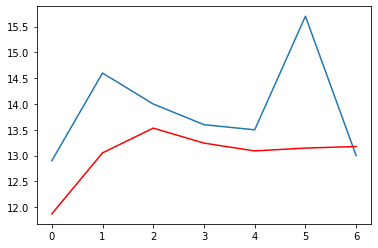

In [19]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
train, test = X[1:len(X) - 7], X[len(X) - 7:]
model = AutoReg(train, lags=29)
model_fit = model.fit()
print(f"Coefficients: {model_fit.params}")
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, expected={test[i]}")

rmse = sqrt(mean_squared_error(test, predictions))
print(f"RMSE: {rmse}")

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()